In [1]:
%load_ext cudf.pandas

<img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">


# Weighted Reductions

Xarray supports [weighted reductions](https://docs.xarray.dev/en/stable/user-guide/computation.html#weighted-array-reductions).

For demonstration, we will create a “weights” array proportional to cosine of latitude.
Modulo a normalization, this is the correct area-weighting factor for data on a regular lat-lon grid.


In [2]:
%%cudf.pandas.profile

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

                                                                                              
                                  Total time elapsed: 1.594 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [3]:
%%cudf.pandas.profile

ds = xr.tutorial.load_dataset("ersstv5")
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 624, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

                                                                                                               
                                           Total time elapsed: 3.813 seconds                                   
                                        303 GPU function calls in 0.129 seconds                                
                                        18 CPU function calls in 0.012 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ isna                      │ 0          │ 0.000       │ 0.000       │ 10         │ 0.006       │ 0.001       │
│ to_timedelta              │ 0          │ 0.000       │ 0.000       │ 6          │ 0.005       │ 0.001       │
│ ndarray.reshape           │ 0          │ 0.000       │ 0.000       │ 2          │ 0.001       │ 0.001       │
│ Index                     │ 3          │ 0.008       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 178        │ 0.054       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy         │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__setattr__  │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 89         │ 0.026       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy        │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__setattr__ │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 6          │ 0.006       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__     │ 2          │ 0.013       │ 0.007       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__repr__    │ 1          │ 0.007       │ 0.007       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna
- to_timedelta
- ndarray.reshape

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=245618;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

('lat',)

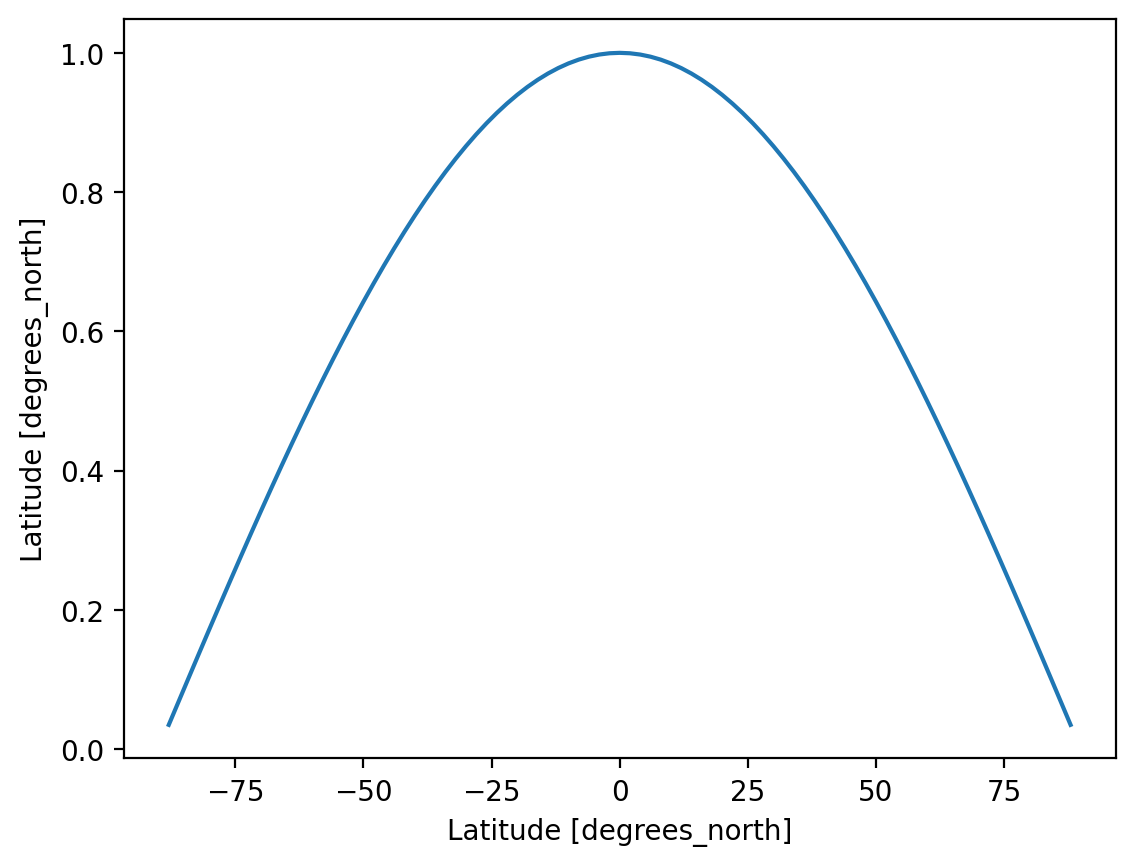

                                                                                                          
                                        Total time elapsed: 0.898 seconds                                 
                                      23 GPU function calls in 0.007 seconds                              
                                      0 CPU function calls in 0.000 seconds                               
                                                                                                          
                                                      Stats                                               
                                                                                                          
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function             ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__ │ 22         │ 0.007       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy    │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└──────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [4]:
%%cudf.pandas.profile

weights = np.cos(np.deg2rad(ds.lat))
display(weights.dims)

weights.plot()

## Manual weighting

Thanks to the automatic broadcasting and alignment discussed earlier, if we multiply this by SST, it “just works,” and the arrays are broadcasted properly:

In [5]:
%%cudf.pandas.profile

(ds.sst * weights).dims

('time', 'lat', 'lon')

                                                                                                           
                                         Total time elapsed: 0.103 seconds                                 
                                      51 GPU function calls in 0.016 seconds                               
                                       0 CPU function calls in 0.000 seconds                               
                                                                                                           
                                                       Stats                                               
                                                                                                           
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function              ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__  │ 34         │ 0.011       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__ │ 12         │ 0.004       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy     │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy    │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals   │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
└───────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

We could imagine computing the weighted spatial mean of SST manually.

Text(0.5, 1.0, 'This is wrong!')

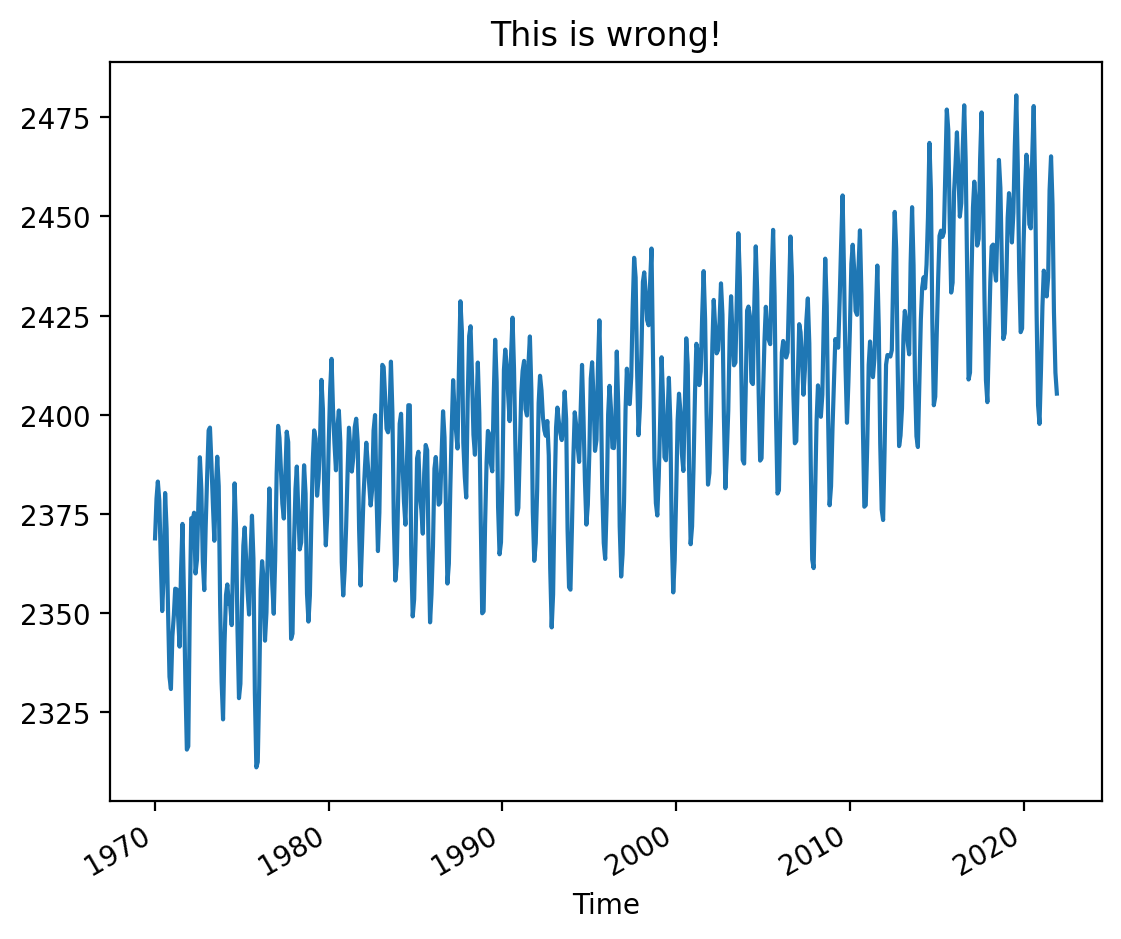

                                                                                                           
                                         Total time elapsed: 4.141 seconds                                 
                                      77 GPU function calls in 0.024 seconds                               
                                       0 CPU function calls in 0.000 seconds                               
                                                                                                           
                                                       Stats                                               
                                                                                                           
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function              ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__  │ 34         │ 0.010       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__ │ 36         │ 0.011       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy     │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy    │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals   │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└───────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [6]:
%%cudf.pandas.profile

sst_mean = (ds.sst * weights).sum(dim=("lon", "lat")) / weights.sum(dim="lat")
sst_mean.plot()
plt.title("This is wrong!")

That would be wrong, however, because the denominator (`weights.sum(dim='lat')`)
needs to be expanded to include the `lon` dimension and modified to account for
the missing values (land points).


## The `weighted` method
In general, weighted reductions on multidimensional arrays are complicated. To
make it a bit easier, Xarray provides a mechanism for weighted reductions. 

It does this by creating a special intermediate `DataArrayWeighted` object, to
which different reduction operations can applied.



In [7]:
%%cudf.pandas.profile

sst_weighted = ds.sst.weighted(weights)
sst_weighted

DataArrayWeighted with weights along dimensions: lat

                                                                                              
                                  Total time elapsed: 0.040 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘


<div class="alert alert-info">
    Xarrays' computation methods (groupby, groupby_bins, rolling, coarsen, weighted) all return special objects that represent the basic underlying computation pattern. For e.g. `sst_weighted` above is a `DatasetWeighted` object that represents the weighting by `weights` of the data in `ds.sst`. It is usually helpful to save and reuse these objects for multiple operations (e.g. a mean and standard deviation calculation).
</div>

Text(0.5, 1.0, 'Correct Global Mean SST')

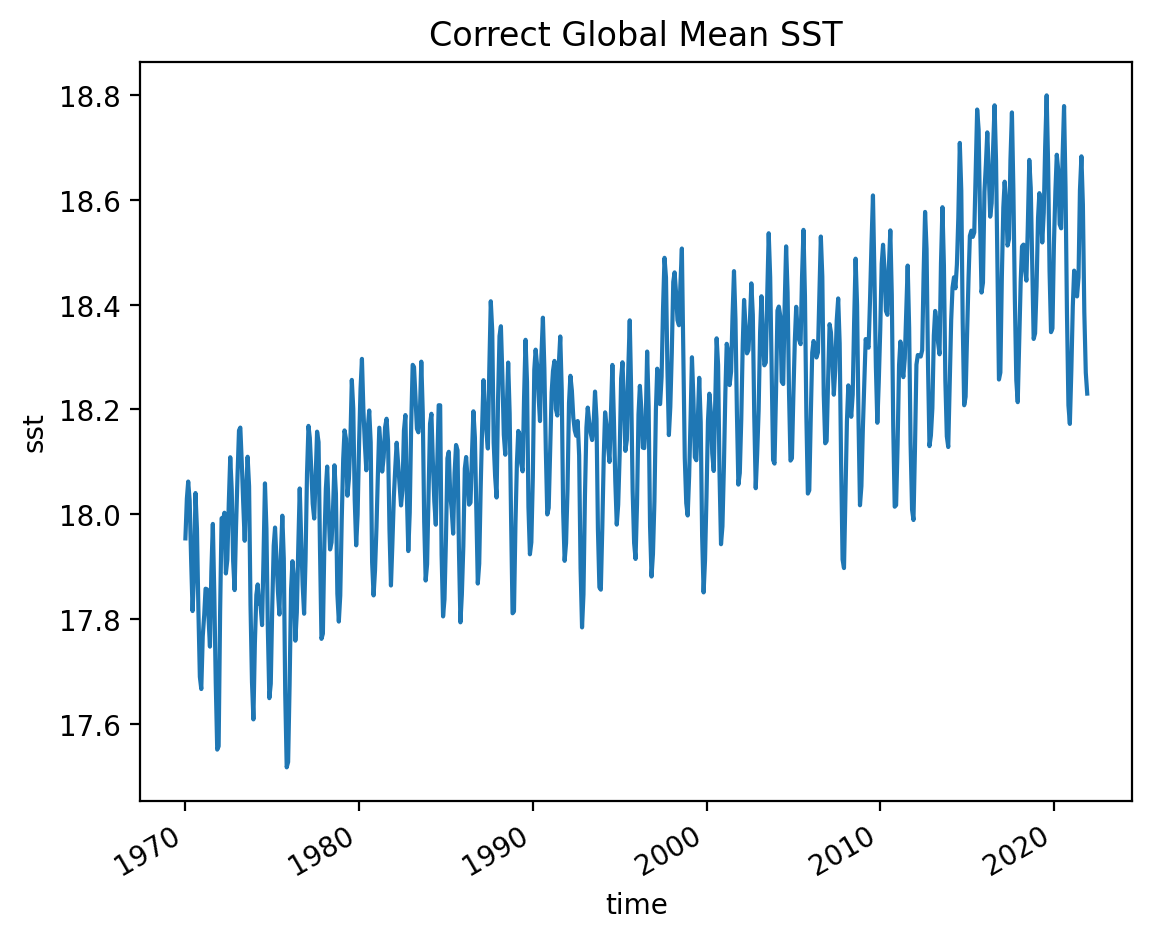

                                                                                                           
                                         Total time elapsed: 4.139 seconds                                 
                                      197 GPU function calls in 0.061 seconds                              
                                       0 CPU function calls in 0.000 seconds                               
                                                                                                           
                                                       Stats                                               
                                                                                                           
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function              ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__  │ 78         │ 0.024       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__ │ 96         │ 0.028       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy     │ 8          │ 0.003       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy    │ 9          │ 0.003       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals   │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.equals  │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└───────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [8]:
%%cudf.pandas.profile

sst_weighted.mean(dim=("lon", "lat")).plot()
plt.title("Correct Global Mean SST");

A handful of reductions have been implemented: [mean, sum, std, var](https://docs.xarray.dev/en/stable/api.html#weighted-objects).